In [33]:
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
from typing import Optional

In [34]:
import pandas as pd

product = pd.read_csv('Product.csv',  sep='\t')
region = pd.read_csv('Region.csv',  sep='\t')
reseller = pd.read_csv('Reseller.csv',  sep='\t')
sales = pd.read_csv('Sales.csv',  sep='\t')
salesperson = pd.read_csv('Salesperson.csv',  sep='\t')
salespersonregion = pd.read_csv('SalespersonRegion.csv',  sep='\t')
targets = pd.read_csv('Targets.csv',  sep='\t')


In [35]:
product.head()

,ProductKey,Product,Standard Cost,Color,Subcategory,Category,Background Color Format,Font Color Format
0,210,"HL Road Frame - Black, 58",$868.63,Black,Road Frames,Components,#000000,#FFFFFF
1,215,"Sport-100 Helmet, Black",$12.03,Black,Helmets,Accessories,#000000,#FFFFFF
2,216,"Sport-100 Helmet, Black",$13.88,Black,Helmets,Accessories,#000000,#FFFFFF
3,217,"Sport-100 Helmet, Black",$13.09,Black,Helmets,Accessories,#000000,#FFFFFF
4,253,"LL Road Frame - Black, 58",$176.2,Black,Road Frames,Components,#000000,#FFFFFF


In [36]:
region.head()

,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [37]:
reseller.head()

,ResellerKey,Business Type,Reseller,City,State-Province,Country-Region
0,277,Specialty Bike Shop,The Bicycle Accessories Company,Alhambra,California,United States
1,455,Value Added Reseller,Timely Shipping Service,Alpine,California,United States
2,609,Value Added Reseller,Good Toys,Auburn,California,United States
3,492,Specialty Bike Shop,Basic Sports Equipment,Baldwin Park,California,United States
4,365,Specialty Bike Shop,Distinctive Store,Barstow,California,United States


In [38]:
sales.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,$28.84,$57.68,$63.45
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,$28.84,$57.68,$63.45
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,$818.7,"$1,637.4","$1,413.62"


In [39]:
salesperson.head()

,EmployeeKey,EmployeeID,Salesperson,Title,UPN
0,272,502097814,Stephen Jiang,North American Sales Manager,stephen-jiang@adventureworks.com
1,277,112432117,Brian Welcker,Director of Sales,brian-welcker@adventureworks.com
2,281,841560125,Michael Blythe,Sales Representative,michael-blythe@adventureworks.com
3,282,191644724,Linda Mitchell,Sales Representative,linda-mitchell@adventureworks.com
4,283,615389812,Jillian Carson,Sales Representative,jillian-carson@adventureworks.com


In [40]:
salesperson.head()

,EmployeeKey,EmployeeID,Salesperson,Title,UPN
0,272,502097814,Stephen Jiang,North American Sales Manager,stephen-jiang@adventureworks.com
1,277,112432117,Brian Welcker,Director of Sales,brian-welcker@adventureworks.com
2,281,841560125,Michael Blythe,Sales Representative,michael-blythe@adventureworks.com
3,282,191644724,Linda Mitchell,Sales Representative,linda-mitchell@adventureworks.com
4,283,615389812,Jillian Carson,Sales Representative,jillian-carson@adventureworks.com


In [41]:
salespersonregion.head()

,EmployeeKey,SalesTerritoryKey
0,272,1
1,272,2
2,272,3
3,272,4
4,272,5


In [42]:
targets.head()

,EmployeeID,Target,TargetMonth
0,90836195,"$500,000","Friday, December 1, 2017"
1,112432117,"$500,000","Saturday, July 1, 2017"
2,139397894,"$500,000","Friday, December 1, 2017"
3,191644724,"$500,000","Friday, September 1, 2017"
4,502097814,"$500,000","Saturday, July 1, 2017"


In [43]:
def _clean_currency(series: pd.Series) -> pd.Series:
    """Convert currency strings like '$1,234.56' to float."""
    return (
        series.astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

In [44]:
def _load_sales(data_dir: Path) -> pd.DataFrame:
    sales = pd.read_csv(data_dir / "Sales.csv", sep="\t")
    sales["Sales"] = _clean_currency(sales["Sales"])
    sales["Cost"] = _clean_currency(sales["Cost"])
    return sales

<Axes: title={'center': 'Total Revenue by Business Type (groups)'}, xlabel='Business Type (groups)', ylabel='Total Revenue'>

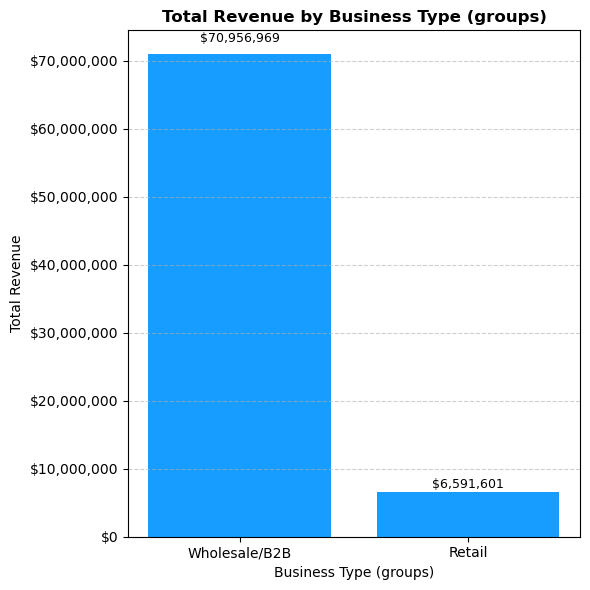

In [45]:
def plot_revenue_by_business_group(
    data_dir: str | Path = ".",
    ax: Optional[plt.Axes] = None,
    save_path: Optional[str | Path] = None,
) -> plt.Axes:
    """
    Plot total revenue grouped into Wholesale/B2B vs Retail.

    Matches the proportions shown in the provided bar chart.
    """
    data_dir = Path(data_dir)
    sales = _load_sales(data_dir)
    reseller = pd.read_csv(data_dir / "Reseller.csv", sep="\t")

    def classify(business_type: str) -> str:
        if pd.isna(business_type):
            return "Unknown"
        bt = business_type.strip().lower()
        if "bike shop" in bt:
            return "Retail"
        if "reseller" in bt or "warehouse" in bt:
            return "Wholesale/B2B"
        return "Wholesale/B2B"

    merged = sales.merge(
        reseller[["ResellerKey", "Business Type"]],
        on="ResellerKey",
        how="left",
    )
    merged["BusinessGroup"] = merged["Business Type"].apply(classify)
    grouped = (
        merged.groupby("BusinessGroup")["Sales"]
        .sum()
        .reindex(["Wholesale/B2B", "Retail"])
        .fillna(0)
    )

    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))

    bars = ax.bar(grouped.index, grouped.values, color="#169dff")
    ax.set_title("Total Revenue by Business Type (groups)", fontsize=12, weight="bold")
    ax.set_xlabel("Business Type (groups)")
    ax.set_ylabel("Total Revenue")
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    for bar, value in zip(bars, grouped.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            value + value * 0.02,
            f"${value:,.0f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

    plt.tight_layout()
    if save_path:
        ax.figure.savefig(save_path, bbox_inches="tight")
    return ax


plot_revenue_by_business_group(save_path="business_type.png")

<Axes: title={'center': 'Total Revenue by Region'}, xlabel='Total Revenue', ylabel='Region'>

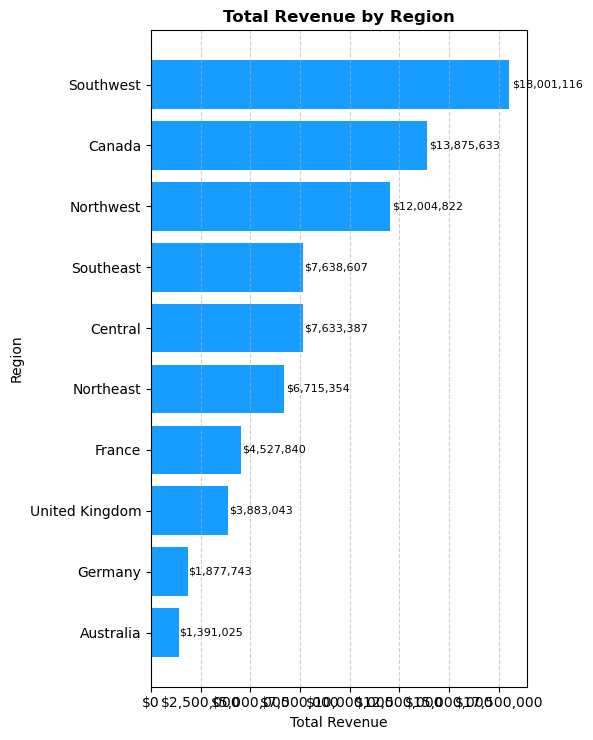

In [46]:
def plot_revenue_by_region(
    data_dir: str | Path = ".",
    ax: Optional[plt.Axes] = None,
    save_path: Optional[str | Path] = None,
) -> plt.Axes:
    """
    Plot horizontal bar chart of total revenue by sales region.
    """
    data_dir = Path(data_dir)
    sales = _load_sales(data_dir)
    region = pd.read_csv(data_dir / "Region.csv", sep="\t")

    merged = sales.merge(
        region[["SalesTerritoryKey", "Region"]],
        on="SalesTerritoryKey",
        how="left",
    )
    grouped = merged.groupby("Region")["Sales"].sum().sort_values(ascending=True)

    if ax is None:
        _, ax = plt.subplots(figsize=(6, 7.5))

    ax.barh(grouped.index, grouped.values, color="#169dff")
    ax.set_title("Total Revenue by Region", fontsize=12, weight="bold")
    ax.set_xlabel("Total Revenue")
    ax.set_ylabel("Region")
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    ax.grid(axis="x", linestyle="--", alpha=0.6)

    for y, value in enumerate(grouped.values):
        ax.text(
            value + value * 0.01,
            y,
            f"${value:,.0f}",
            va="center",
            fontsize=8,
        )

    plt.tight_layout()
    if save_path:
        ax.figure.savefig(save_path, bbox_inches="tight")
    return ax


plot_revenue_by_region(save_path="region.png")

C:\Users\anand\AppData\Local\Temp\ipykernel_34652\4164948384.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sales.groupby("SaleBin")["Sales"].sum()


<Axes: title={'center': 'Total Revenue by Sales (bins)'}, xlabel='Sales (bin start)', ylabel='Total Revenue'>

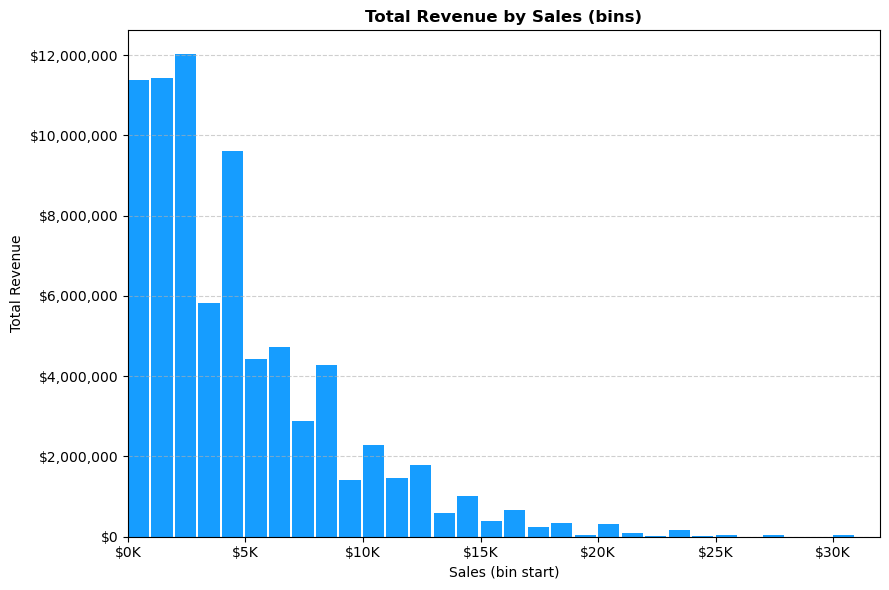

In [47]:
def plot_revenue_by_sales_bins(
    data_dir: str | Path = ".",
    bin_width: float = 1000.0,
    ax: Optional[plt.Axes] = None,
    save_path: Optional[str | Path] = None,
) -> plt.Axes:
    """
    Plot revenue summed within sales-amount bins (histogram style).
    """
    data_dir = Path(data_dir)
    sales = _load_sales(data_dir)

    max_sale = sales["Sales"].max()
    bins = np.arange(0, max_sale + bin_width, bin_width)
    sales["SaleBin"] = pd.cut(sales["Sales"], bins=bins, right=False)
    grouped = sales.groupby("SaleBin")["Sales"].sum()

    left_edges = np.array([interval.left for interval in grouped.index])
    values = grouped.values

    if ax is None:
        _, ax = plt.subplots(figsize=(9, 6))

    ax.bar(left_edges, values, width=bin_width * 0.9, align="edge", color="#169dff")
    ax.set_title("Total Revenue by Sales (bins)", fontsize=12, weight="bold")
    ax.set_xlabel("Sales (bin start)")
    ax.set_ylabel("Total Revenue")
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda v, pos: f"${int(v/1000)}K")
    )
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.set_xlim(0, max_sale + bin_width)

    plt.tight_layout()
    if save_path:
        ax.figure.savefig(save_path, bbox_inches="tight")
    return ax


plot_revenue_by_sales_bins(save_path="sales_bins.png")